<h1>Model 3: MSSQL</h1>
<p>sample MSSQL is taken from first 10000 rows after sorting data by label, AtoZ<p>

In [52]:
import pandas as pd
import csv
import requests
import numpy as np
sheet = pd.read_excel("sample3_MSSQL.xlsx")
sheet.head(8559)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,142,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 11:32:35.075,112597315,52,...,0.717741,7,4,9383103.25,257958.305025,9810774,9048572,0,0,BENIGN
1,0,192.168.50.6-104.88.60.48-57271-80-6,192.168.50.6,57271,104.88.60.48,80,6,2018-12-01 11:32:37.701,2,2,...,0.000000,0,0,0.00,0.000000,0,0,0,0,BENIGN
2,1,192.168.50.6-104.88.29.90-57270-80-6,192.168.50.6,57270,104.88.29.90,80,6,2018-12-01 11:32:37.701,1,2,...,0.000000,0,0,0.00,0.000000,0,0,0,0,BENIGN
3,2,192.168.50.6-104.88.29.90-57272-80-6,192.168.50.6,57272,104.88.29.90,80,6,2018-12-01 11:32:37.701,1,2,...,0.000000,0,0,0.00,0.000000,0,0,0,0,BENIGN
4,3,192.168.50.6-104.88.60.48-57271-80-6,104.88.60.48,80,192.168.50.6,57271,6,2018-12-01 11:32:37.721,1,2,...,0.000000,0,0,0.00,0.000000,0,0,0,1,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8554,42680,172.16.0.5-192.168.50.1-944-19315-17,172.16.0.5,944,192.168.50.1,19315,17,2018-12-01 11:32:35.138,2,2,...,0.000000,0,0,0.00,0.000000,0,0,0,1,DrDoS_MSSQL
8555,35136,172.16.0.5-192.168.50.1-900-51598-17,172.16.0.5,900,192.168.50.1,51598,17,2018-12-01 11:32:35.139,1,2,...,0.000000,0,0,0.00,0.000000,0,0,0,1,DrDoS_MSSQL
8556,21946,172.16.0.5-192.168.50.1-945-28475-17,172.16.0.5,945,192.168.50.1,28475,17,2018-12-01 11:32:35.139,2,2,...,0.000000,0,0,0.00,0.000000,0,0,0,1,DrDoS_MSSQL
8557,36570,172.16.0.5-192.168.50.1-946-13500-17,172.16.0.5,946,192.168.50.1,13500,17,2018-12-01 11:32:35.140,1,2,...,0.000000,0,0,0.00,0.000000,0,0,0,1,DrDoS_MSSQL


In [53]:
sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    9999 non-null   int64         
 1   Flow ID                       9999 non-null   object        
 2    Source IP                    9999 non-null   object        
 3    Source Port                  9999 non-null   int64         
 4    Destination IP               9999 non-null   object        
 5    Destination Port             9999 non-null   int64         
 6    Protocol                     9999 non-null   int64         
 7    Timestamp                    9999 non-null   datetime64[ns]
 8    Flow Duration                9999 non-null   int64         
 9    Total Fwd Packets            9999 non-null   int64         
 10   Total Backward Packets       9999 non-null   int64         
 11  Total Length of Fwd Packets   

In [54]:

sheet.columns = sheet.columns.str.strip()
sheet.columns

Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Le

<Axes: title={'center': 'Flow Duration Histogram'}, ylabel='Frequency'>

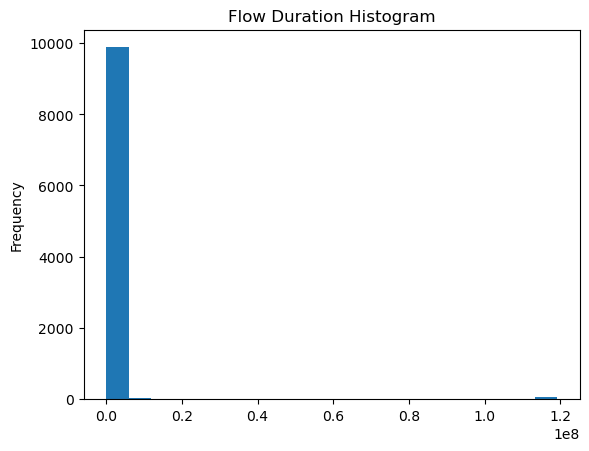

In [55]:
sheet['Flow Duration'].plot(kind='hist', bins=20, title='Flow Duration Histogram')

<Axes: title={'center': 'Packet Length Variance'}>

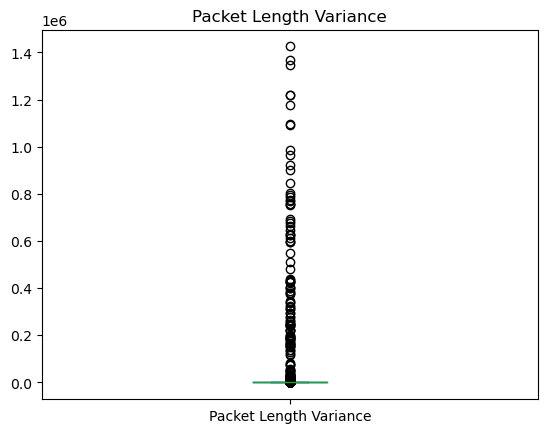

In [56]:
sheet['Packet Length Variance'].plot(kind='box', title='Packet Length Variance')

<Axes: title={'center': 'Total Fwd Packets vs. Total Backward Packets'}, xlabel='Total Fwd Packets', ylabel='Total Backward Packets'>

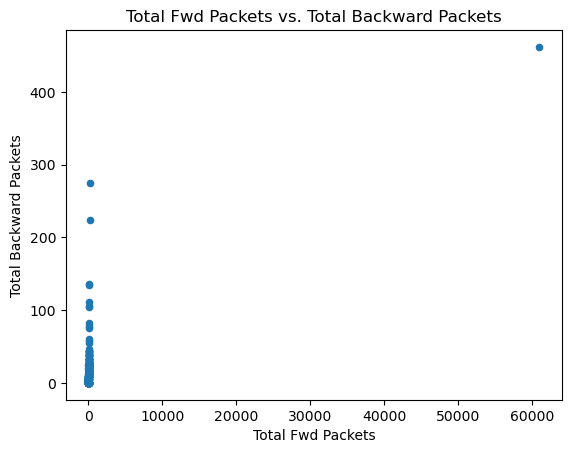

In [57]:
sheet.plot(kind='scatter', x='Total Fwd Packets', y='Total Backward Packets', title='Total Fwd Packets vs. Total Backward Packets')


<Axes: title={'center': 'Flow IAT Mean Over Time'}>

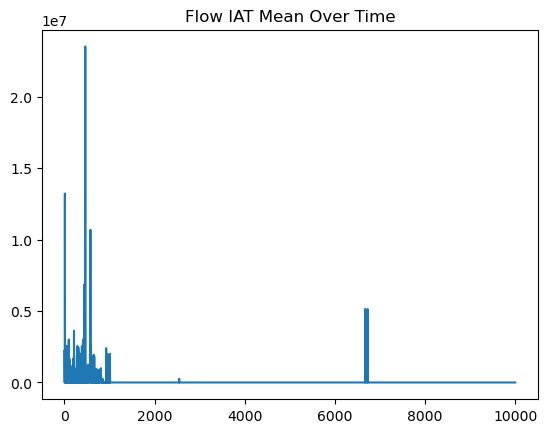

In [58]:
sheet['Flow IAT Mean'].plot(kind='line', title='Flow IAT Mean Over Time')

Text(0.5, 1.0, 'Correlation Heatmap for Numerical Features')

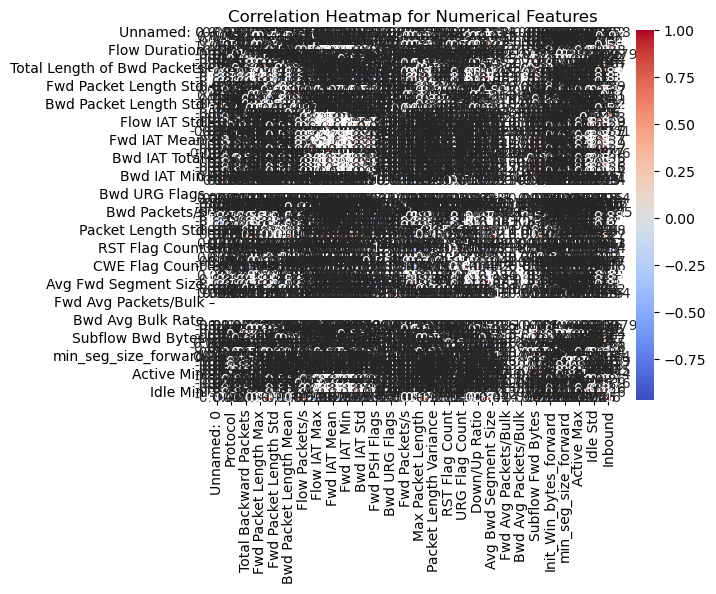

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = sheet.select_dtypes(include='number')
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Features')

Label
DrDoS_MSSQL    8985
BENIGN         1014
Name: count, dtype: int64

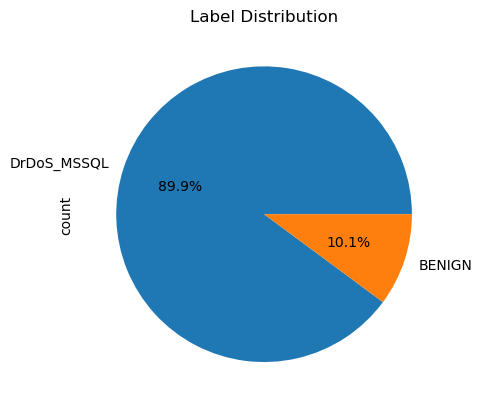

In [60]:
sheet['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Label Distribution')
sheet['Label'].value_counts()

In [61]:
sheet['Label'] = sheet['Label'].map({"BENIGN": 0,"DrDoS_MSSQL": 1})
sheet['Label'].value_counts()

Label
1    8985
0    1014
Name: count, dtype: int64

In [62]:
df_nums = sheet[sheet.select_dtypes(include=['number']).columns]

inf_mask = np.isinf(df_nums.values)
df_nums.replace([np.inf, -np.inf], np.nan, inplace=True)
#df_nums.fillna(df_nums.max(), inplace=True)
df_nums.dropna(inplace=True) # dropping nans for now

C:\Users\15hen\AppData\Local\Temp\ipykernel_18500\1633850366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\15hen\AppData\Local\Temp\ipykernel_18500\1633850366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums.dropna(inplace=True) # dropping nans for now


In [63]:
df_nums.head(10)
df_nums.count()

Unnamed: 0          9866
Source Port         9866
Destination Port    9866
Protocol            9866
Flow Duration       9866
                    ... 
Idle Std            9866
Idle Max            9866
Idle Min            9866
Inbound             9866
Label               9866
Length: 83, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# For adjusting Imbalance of Having less benign data we include
from sklearn.utils.class_weight import compute_class_weight 
#data pre-processing

x = df_nums.drop(columns='Label')
y = df_nums['Label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=12)




In [71]:
# Calculate class weights based on the imbalance in the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

class_weights

# This looks right as The Benign data notes as 0 is given a higher weight
# Than that of the MSSQL malicious attack. About a 10:1 ratio. 

array([4.80048662, 0.55813296])

In [66]:
# Create a dictionary for class weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
class_weight_dict

{0: 4.800486618004866, 1: 0.5581329561527582}

In [67]:
# Train the logistic regression model with class weights
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight=class_weight_dict)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9949341438703141


In [68]:
#Predict On some data
model.predict(x_test[1:50])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1], dtype=int64)

In [69]:
# Show correct answer
y_test[1:50]

450     0
7257    1
5018    1
4129    1
3525    1
1050    1
6996    1
3605    1
9808    1
4156    1
2792    1
4874    1
3114    1
3494    1
4502    1
2851    1
5252    1
1589    1
875     0
7347    1
9622    1
5005    1
6707    1
8024    1
3363    1
7686    1
3817    1
8558    1
1665    1
5628    1
756     0
8370    1
9430    1
7559    1
9368    1
5974    1
2841    1
6239    1
7124    1
3192    1
8687    1
4744    1
2334    1
4209    1
8582    1
3309    1
819     0
1533    1
7007    1
Name: Label, dtype: int64